In [ ]:
pip install xgboost

In [ ]:
pip install catboost

In [ ]:
pip install scikit-optimize

In [1]:
# Data manipulation and plotting modules
import os
import pandas as pd

# Data pre-processing
# Data splitting and model parameter search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

In [2]:
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [3]:
# For plotting
import matplotlib.pyplot as plt

In [4]:
# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [5]:
# From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
data = pd.read_csv("train.csv")

In [7]:
# To read first 5 rows of train data file
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# To check train data file total columns and rows
print("\n Shape")
data.shape                # 10886, 12)

#To check total columns
print("\n\n Columns")
data.columns.values      
print("\n")

#To check Data types
print("\n\nData types")                        
data.dtypes.value_counts()  
print("\n")
data.head(3)


 Shape


(10886, 12)



 Columns


array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)





Data types


int64      8
float64    3
object     1
dtype: int64

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [9]:
# To check null values
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
# We do not need datatime column
data.drop(['datetime'], axis=1,inplace=True)

In [11]:
#  Divide data into predictors and target
#     First 10 columns are predictors
X = data.iloc[ :, 0:10]
X.head(2)

# 11st column is target
print("\n\nTarget,y, values")
y = data.iloc[ : , 10]
y.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0,3,13
1,1,0,0,1,9.02,13.635,80,0.0,8,32




Target,y, values


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [12]:
#  Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    
                                                    )


X_train.shape        
X_test.shape         
y_train.shape        
y_test.shape

(7075, 10)

(3811, 10)

(7075,)

(3811,)

In [13]:
#Creating pipeline
#Pipe using XGBoost
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBRegressor(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# Instantiate Pipeline object
pipe_xg = Pipeline(steps_xg)

In [14]:
# Grid Search code to discover best pipeline parameters
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, gamma=None,
                gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=3,
                num_parallel_tree=None, predictor=None, random_state=None,
                reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_byle

In [15]:
# Deifne dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [5,10],
              'xg__booster': ['gbtree','gblinear']
              }

In [16]:
#  Define revised dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [5,6],
 
              'pca__n_components' : [5,10],
               }                               # Total: 2 * 2 * 2 * 2

In [17]:
#### Instantiating GridSearchCV class
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   
                      # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [18]:
from time import sleep
from time import *             #meaning from time import EVERYTHING
import time

In [19]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[11:35:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interac...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100, n_jobs=3,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             n_jobs=2,
             param_grid={'pca__n_components': [5, 10],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [5, 6]},
             verbose=1)

0.07924144665400187

In [20]:
from sklearn.metrics import r2_score


In [21]:
y_pred = clf.predict(X_train)


In [22]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9924407745512809


In [23]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.1887649091309456


Text(0.5, 0, 'y_pred/predicted values')

Text(0, 0.5, 'Residuals')

(-10.0, 10.0)

(0.0, 26.0)

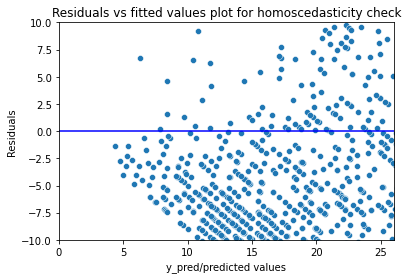

In [24]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [25]:
#  Get feature importances from GridSearchCV best fitted 'xg' model
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_

(10,)



---Feature importances---



array([0.45579004, 0.023441  , 0.06771559, 0.0022561 , 0.2421357 ,
       0.06085188, 0.03699458, 0.02404679, 0.08596409, 0.00080424],
      dtype=float32)

In [26]:
colnames = X.columns.tolist()

In [27]:
#  Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')


df_imp

,imp
registered,0.000804
weather,0.002256
holiday,0.023441
windspeed,0.024047
humidity,0.036995
atemp,0.060852
workingday,0.067716
casual,0.085964
temp,0.242136
season,0.455790


In [28]:
#  First five columns with least feature importance are:
list(df_imp.index.values[:5])

['registered', 'weather', 'holiday', 'windspeed', 'humidity']

In [29]:
# Let us drop these from X_train and X_test
Xtrain = X_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:5]))

# Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                         
                     )

           
start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[11:35:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interac...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100, n_jobs=3,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             n_jobs=2,
             param_grid={'pca__n_components': [5, 10],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [5, 6]},
             verbose=2)

0.04102298418680827

In [30]:
# Make predictions
y_pred_dr = clf_dr.predict(Xtrain)

In [31]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_dr)))

R squared: 0.7197630090830197


**Random Search code to discover best pipeline parameters**

In [32]:
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

In [33]:
##################### EE. Randomized Search #################

# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(8,10)}

In [34]:
# Tune parameters using random search
#     Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                         
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [35]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60

[11:36:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           i...
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=3,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None,
                                                           reg_alpha=None,
                                                           reg_lambda=None, ...))]),
                   n_iter=4, n_jobs=2,
                   param_distributions={'pca__n_components': range(8, 10),
                                        'xg__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f80a3d0c430>,
                                        'xg__max_depth': range(3, 10),
                                        'xg__n_estimators': range(50, 300)})

0.0428059180577596

In [36]:
y_pred1 = rs.predict(X_train)

In [37]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred1)))

R squared: 0.9991297136838617


**Cross Validation**

In [38]:
# Cross-validation is a more reliable validation technique than just one train/test split. 
# Here we'll resort to ShuffleSplit to create 5 70%/30% splits
from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
from sklearn.ensemble import RandomForestRegressor


In [41]:
model_rf1 = RandomForestRegressor(n_estimators=100, n_jobs=4,
                                   max_depth=None, random_state=17)


cv_scores_rf1 = cross_val_score(model_rf1, X, y, cv=cv, scoring='neg_mean_squared_error')

In [42]:
model_rf2 = RandomForestRegressor(n_estimators=100, n_jobs=4,
                                   min_samples_leaf=3, random_state=17)

cv_scores_rf2 = cross_val_score(model_rf2, X, y, cv=cv, 
                                scoring='neg_mean_squared_error', n_jobs=-1)

In [43]:
cv_scores_rf1

array([-11.95872596, -11.53583763, -12.49484023, -16.35342416,
        -7.47852076])

In [44]:
cv_scores_rf2

array([-14.33600195, -14.83665678, -15.53634517, -20.3830755 ,
        -9.22852508])

In [45]:
print('Model 1 mean score:', cv_scores_rf1.mean())
print('Model 2 mean score:', cv_scores_rf2.mean())

Model 1 mean score: -11.96426974892835
Model 2 mean score: -14.864120895769048


In [46]:
from sklearn.metrics import mean_squared_error


In [47]:
y_true = [-11.95872596, -11.53583763, -12.49484023, -16.35342416,
        -7.47852076]
y_pred = [-14.33600195, -14.83665678, -15.53634517, -20.3830755 ,
        -9.22852508]


In [48]:
mean_squared_error(y_true, y_pred)

9.019641107132816

In [49]:
mean_squared_error(y_true, y_pred, squared=False)

3.00327173381511